In [3]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [4]:
#importing the dataset into a dataframe
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

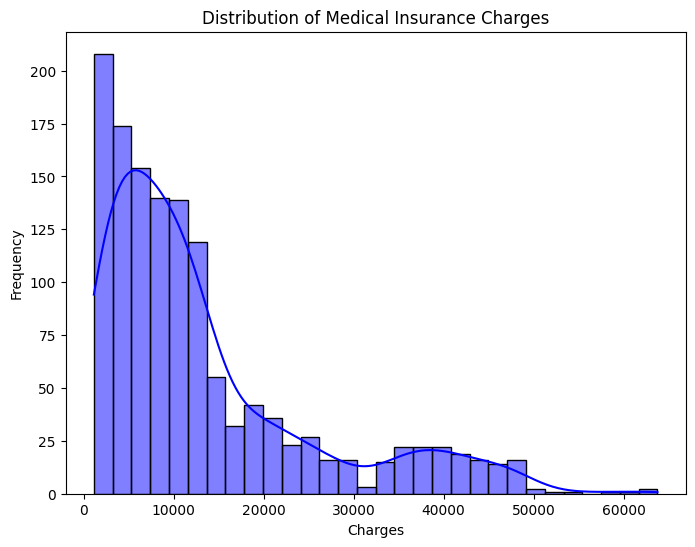

In [ ]:
#Distribution of Charges
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

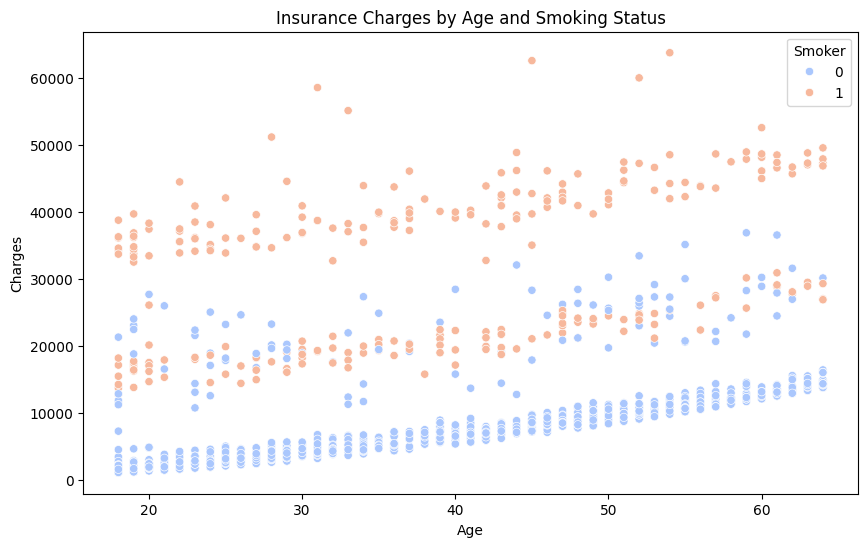

In [ ]:
#Charges by Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data, hue='smoker', palette='coolwarm')
plt.title('Insurance Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_18516\4103237673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')


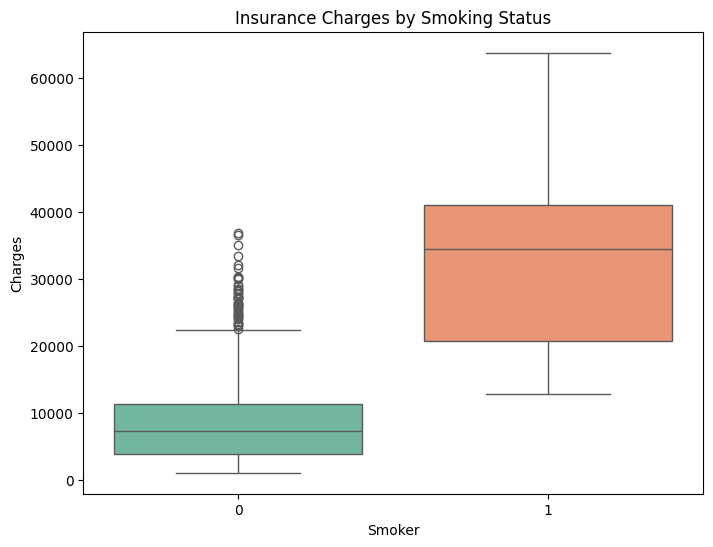

In [ ]:
#Box Plot of Charges by Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_18516\2406978218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=data, estimator=np.mean, palette='viridis')


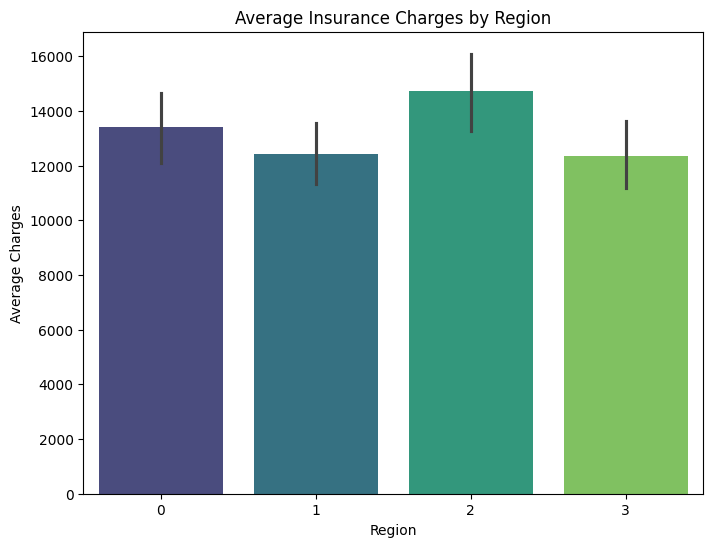

In [ ]:
#Average Charges by Region
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=data, estimator=np.mean, palette='viridis')
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


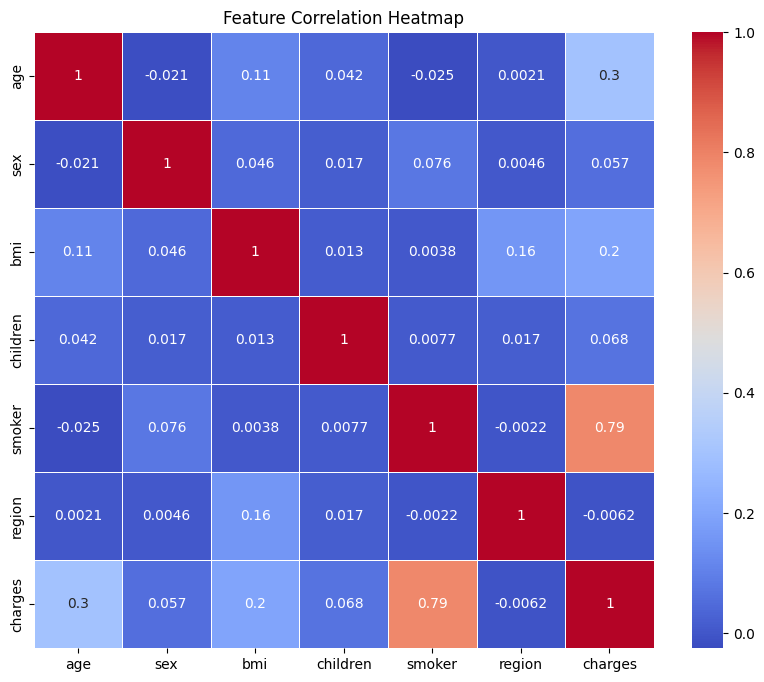

In [ ]:
#Heatmap of Correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [10]:
encoder = LabelEncoder()

In [11]:
labels = encoder.fit_transform(data.sex)

In [12]:
data['sex'] = labels

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
labels = encoder.fit_transform(data.region)

In [15]:
data['region'] = labels

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520


In [17]:
labels = encoder.fit_transform(data.smoker)

In [18]:
data['smoker'] = labels

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
#splitting the parameters and target variable
X = data.drop(columns='charges',axis=1)
Y = data['charges']

In [21]:
#train test split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [23]:
model = RandomForestRegressor()

In [24]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
testing_data_prediction = model.predict(X_test)

In [26]:
score = metrics.r2_score(Y_test,testing_data_prediction)

In [27]:
score

0.8420040069758864

In [28]:
#BULDING THE PREDICTION SYSTEM
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))

Predicted Medical Insurance Cost :  [17112.0303602]


c:\Users\aksha\Desktop\Project2\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [29]:
import pickle

filename = 'medical_insurance_cost_predictor.sav'
pickle.dump(model, open(filename,'wb'))